In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the csv files pertaining to the incidence of the different cardiac diseases
incidence_failure_path = Path("../Resources/incidence_rates/failure_incidence.csv") 
incidence_failure = pd.read_csv(incidence_failure_path, encoding='ISO-8859-1',skiprows=1 )

incidence_ischemic_path = Path("../Resources/incidence_rates/ischemic_incidence.csv") 
incidence_ischemic = pd.read_csv(incidence_ischemic_path, encoding='ISO-8859-1', skiprows=1)

incidence_myocardial_path = Path("../Resources/incidence_rates/myocardial_incidence.csv") 
incidence_myocardial = pd.read_csv(incidence_myocardial_path, encoding='ISO-8859-1',skiprows=1)


In [3]:
#Load the csv files pertaining to the deaths caused by the different cardiac diseases
mortality_failure_path = Path("../Resources/mortality_rates/failure_mortality.csv") 
mortality_failure = pd.read_csv(mortality_failure_path, encoding='ISO-8859-1', skiprows=1)

mortality_ischemic_path = Path("../Resources/mortality_rates/ischemic_mortality.csv") 
mortality_ischemic = pd.read_csv(mortality_ischemic_path, encoding='ISO-8859-1', skiprows=1)

mortality_myocardial_path = Path("../Resources/mortality_rates/myocardial_mortality.csv") 
mortality_myocardial = pd.read_csv(mortality_myocardial_path, encoding='ISO-8859-1', skiprows=1)

In [4]:
#Load the csv files pertaining to healthcare spending
healthcare_spending_path = Path("../Resources/healthcare_summary.csv") 
healthcare_spending = pd.read_csv(healthcare_spending_path, encoding='ISO-8859-1', skiprows=4)

In [5]:
#Load the csv files pertaining to the risk factors associated with cardiac diseases
alberta_risks_path = Path("../Resources/risk_factors/alberta_risks.csv")
alberta_risks = pd.read_csv(alberta_risks_path, encoding='ISO-8859-1', on_bad_lines='skip', skiprows=8)

bc_risks_path = Path("../Resources/risk_factors/bc_risks.csv")
bc_risks = pd.read_csv(bc_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

manitoba_risks_path = Path("../Resources/risk_factors/manitoba_risks.csv")
manitoba_risks = pd.read_csv(manitoba_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

nb_risks_path = Path("../Resources/risk_factors/nb_risks.csv")
nb_risks = pd.read_csv(nb_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

nfl_risks_path = Path("../Resources/risk_factors/nfl_risks.csv")
nfl_risks = pd.read_csv(nfl_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

ns_risks_path = Path("../Resources/risk_factors/ns_risks.csv")
ns_risks = pd.read_csv(ns_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

ontario_risks_path = Path("../Resources/risk_factors/ontario_risks.csv")
ontario_risks = pd.read_csv(ontario_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

pei_risks_path = Path("../Resources/risk_factors/pei_risks.csv")
pei_risks = pd.read_csv(pei_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

quebec_risks_path = Path("../Resources/risk_factors/quebec_risks.csv")
quebec_risks = pd.read_csv(quebec_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

sask_risks_path = Path("../Resources/risk_factors/sask_risks.csv")
sask_risks = pd.read_csv(sask_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')



In [6]:
#Load the dataset pertaining to incidence of heart failure
incidence_failure.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Rate (per 100,000)",Standard Error,Lower 95%_CI,Upper 95%_CI,Rate CV (%),Counts,Population,Unnamed: 12
0,Canada,Both sexes,Total,40+,20002001,731.0,2.30,726.0,735.0,0.32,100690.0,13779180.0,NaN
1,Canada,Females,Total,40+,20002001,716.0,3.16,710.0,723.0,0.44,51370.0,7171470.0,NaN
2,Canada,Males,Total,40+,20002001,746.0,3.36,740.0,753.0,0.45,49315.0,6607705.0,NaN
3,Canada,Both sexes,Total,40+,20012002,687.0,2.20,683.0,691.0,0.32,97115.0,14138230.0,NaN
4,Canada,Females,Total,40+,20012002,675.0,3.03,669.0,680.0,0.45,49575.0,7349705.0,NaN


In [7]:
#Load the names of the columns to ensure that we are dealing with the correct ones
incidence_failure.columns

Index(['Geography', 'Sex', 'Age group type', 'Age group', 'Fiscal year',
       'Rate (per 100,000)', 'Standard Error', 'Lower 95%_CI', 'Upper 95%_CI',
       'Rate CV (%)', 'Counts', 'Population', 'Unnamed: 12'],
      dtype='object')

In [8]:
#Drop all unnecessary columns
columns_kept = ["Geography", "Sex", "Fiscal year", "Rate (per 100,000)", "Counts", "Population"]
incidence_failure_cleaned = incidence_failure[columns_kept]



incidence_failure_cleaned.head()



,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts,Population
0,Canada,Both sexes,20002001,731.0,100690.0,13779180.0
1,Canada,Females,20002001,716.0,51370.0,7171470.0
2,Canada,Males,20002001,746.0,49315.0,6607705.0
3,Canada,Both sexes,20012002,687.0,97115.0,14138230.0
4,Canada,Females,20012002,675.0,49575.0,7349705.0


In [9]:
# Replace non-ASCII characters in 'Fiscal year'
incidence_failure_cleaned['Fiscal year'] = incidence_failure_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
incidence_failure_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
incidence_failure_final = incidence_failure_cleaned[incidence_failure_cleaned["Sex"] == "Both sexes"]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
incidence_failure_final = incidence_failure_final[incidence_failure_final['Fiscal year'] >= '2015-2016']

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34835/586819389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_failure_cleaned['Fiscal year'] = incidence_failure_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34835/586819389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_failure_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)


In [10]:
# Reset index and drop the old index
incidence_failure_final.reset_index(drop=True, inplace=True)
#Drop all rows below the last row of data of interest
incidence_failure_final = incidence_failure_final.iloc[:963]

incidence_failure_final

,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts,Population
0,Canada,Both sexes,2015-2016,544.0,101185.0,18610495.0
1,Canada,Both sexes,2016-2017,538.0,101655.0,18898575.0
2,Canada,Both sexes,2017-2018,557.0,106765.0,19181935.0
3,Canada,Both sexes,2018-2019,560.0,109105.0,19485510.0
4,Canada,Both sexes,2019-2020,560.0,111030.0,19822955.0
...,...,...,...,...,...,...
107,Nunavut,Both sexes,2018-2019,512.0,60.0,11730.0
108,Nunavut,Both sexes,2019-2020,468.0,55.0,11745.0
109,Nunavut,Both sexes,2020-2021*,381.0,45.0,11815.0
110,Nunavut,Both sexes,2021-2022*,496.0,60.0,12100.0


In [11]:
#Load the dataset pertaining to incidence of ischemic heart disease
incidence_ischemic.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Rate (per 100,000)",Standard Error,Lower 95%_CI,Upper 95%_CI,Rate CV (%),Counts,Population,Unnamed: 12
0,Canada,Both sexes,Total,20+,20002001,991.0,2.12,986.0,995.0,0.21,217465.0,21952330.0,NaN
1,Canada,Females,Total,20+,20002001,886.0,2.80,880.0,891.0,0.32,100270.0,11318190.0,NaN
2,Canada,Males,Total,20+,20002001,1102.0,3.22,1096.0,1108.0,0.29,117190.0,10634135.0,NaN
3,Canada,Both sexes,Total,20+,20012002,921.0,2.04,917.0,925.0,0.22,204410.0,22186025.0,NaN
4,Canada,Females,Total,20+,20012002,827.0,2.69,822.0,833.0,0.33,94650.0,11438565.0,NaN


In [12]:
#Drop all unnecessary columns
columns_kept = ["Geography", "Sex", "Fiscal year", "Rate (per 100,000)", "Counts", "Population"]
incidence_ischemic_cleaned = incidence_ischemic[columns_kept]

incidence_ischemic_cleaned.head()

,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts,Population
0,Canada,Both sexes,20002001,991.0,217465.0,21952330.0
1,Canada,Females,20002001,886.0,100270.0,11318190.0
2,Canada,Males,20002001,1102.0,117190.0,10634135.0
3,Canada,Both sexes,20012002,921.0,204410.0,22186025.0
4,Canada,Females,20012002,827.0,94650.0,11438565.0


In [13]:
# Replace non-ASCII characters in 'Fiscal year'
incidence_ischemic_cleaned['Fiscal year'] = incidence_ischemic_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
incidence_ischemic_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
incidence_ischemic_final = incidence_ischemic_cleaned[incidence_ischemic_cleaned["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
incidence_ischemic_final = incidence_ischemic_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
incidence_ischemic_final = incidence_ischemic_final[incidence_ischemic_final['Fiscal year'] >= '2015-2016']

incidence_ischemic_final

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34835/58992920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_ischemic_cleaned['Fiscal year'] = incidence_ischemic_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34835/58992920.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_ischemic_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)


,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts,Population
45,Canada,Both sexes,2015-2016,590.0,159230.0,26993150.0
48,Canada,Both sexes,2016-2017,596.0,163110.0,27368245.0
51,Canada,Both sexes,2017-2018,589.0,163290.0,27741415.0
54,Canada,Both sexes,2018-2019,576.0,162255.0,28186955.0
57,Canada,Both sexes,2019-2020,580.0,166545.0,28704795.0
...,...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,266.0,65.0,24395.0
954,Nunavut,Both sexes,2019-2020,288.0,70.0,24305.0
957,Nunavut,Both sexes,2020-2021*,205.0,50.0,24335.0
960,Nunavut,Both sexes,2021-2022*,324.0,80.0,24705.0


In [14]:
#Load the dataset pertaining to incidence of myocardial infarction
incidence_myocardial

,Geography,Sex,Age group type,Age group,Fiscal year,"Rate (per 100,000)",Standard Error,Lower 95%_CI,Upper 95%_CI,Rate CV (%),Counts,Population,Unnamed: 12
0,Canada,Both sexes,Total,20+,20002001,266.0,1.08,264.0,269.0,0.40,61410.0,23044910.0,NaN
1,Canada,Females,Total,20+,20002001,194.0,1.28,192.0,197.0,0.66,22935.0,11821340.0,NaN
2,Canada,Males,Total,20+,20002001,343.0,1.75,339.0,346.0,0.51,38470.0,11223560.0,NaN
3,Canada,Both sexes,Total,20+,20012002,266.0,1.07,264.0,268.0,0.40,62230.0,23371450.0,NaN
4,Canada,Females,Total,20+,20012002,197.0,1.28,195.0,200.0,0.65,23620.0,11989080.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,Canadian Chronic Disease Surveillance System 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,https://health-infobase.canada.ca/CCDSS/data-t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,https://sante-infobase.canada.ca/SCSMC/outil-d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Drop all unnecessary columns
columns_kept = ["Geography", "Sex", "Fiscal year", "Rate (per 100,000)", "Counts", "Population"]
incidence_myocardial_cleaned = incidence_myocardial[columns_kept]

incidence_myocardial_cleaned.head()

,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts,Population
0,Canada,Both sexes,20002001,266.0,61410.0,23044910.0
1,Canada,Females,20002001,194.0,22935.0,11821340.0
2,Canada,Males,20002001,343.0,38470.0,11223560.0
3,Canada,Both sexes,20012002,266.0,62230.0,23371450.0
4,Canada,Females,20012002,197.0,23620.0,11989080.0


In [16]:
# Replace non-ASCII characters in 'Fiscal year'
incidence_myocardial_cleaned['Fiscal year'] = incidence_myocardial_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
incidence_myocardial_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
incidence_myocardial_final = incidence_myocardial_cleaned[incidence_myocardial_cleaned["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
incidence_myocardial_final = incidence_myocardial_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
incidence_myocardial_final = incidence_myocardial_final[incidence_myocardial_final['Fiscal year'] >= '2015-2016']

incidence_myocardial_final

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34835/3576148516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_myocardial_cleaned['Fiscal year'] = incidence_myocardial_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34835/3576148516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_myocardial_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)


,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts,Population
45,Canada,Both sexes,2015-2016,223.0,63975.0,28738580.0
48,Canada,Both sexes,2016-2017,227.0,66135.0,29133585.0
51,Canada,Both sexes,2017-2018,225.0,66565.0,29524790.0
54,Canada,Both sexes,2018-2019,224.0,67235.0,29987655.0
57,Canada,Both sexes,2019-2020,214.0,65210.0,30522710.0
...,...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,120.0,30.0,24910.0
954,Nunavut,Both sexes,2019-2020,101.0,25.0,24805.0
957,Nunavut,Both sexes,2020-2021*,80.0,20.0,24850.0
960,Nunavut,Both sexes,2021-2022*,159.0,40.0,25220.0


In [17]:
#Load the dataset pertaining to deaths caused by heart failure
mortality_failure

,Geography,Sex,Age group type,Age group,Fiscal year,"Mortality without the condition (per 100,000)",Standard Error of mortality without the condition,Lower 95%_CI of mortality without the condition,Upper 95%_CI of mortality without the condition,Rate CV (%) of mortality without the condition,...,Standard Error of mortality with the condition,Lower 95%_CI of mortality with the condition,Upper 95%_CI of mortality with the condition,Rate CV (%) of mortality with the condition,Counts of mortality with the condition,Population of mortality with the condition,Rate ratio,Lower 95%_CI of rate ratio,Upper 95%_CI of rate ratio,Unnamed: 22
0,Canada,Both sexes,Total,40+,20002001,1137.0,3.13,1131.0,1144.0,0.27,...,83.07,7630.0,7960.0,1.07,65940.0,458165.0,6.85,6.70,7.00,NaN
1,Canada,Females,Total,40+,20002001,934.0,3.66,927.0,941.0,0.39,...,133.24,7151.0,7685.0,1.80,33625.0,238715.0,7.93,7.65,8.22,NaN
2,Canada,Males,Total,40+,20002001,1417.0,5.70,1406.0,1429.0,0.40,...,106.57,8042.0,8468.0,1.29,32315.0,219455.0,5.82,5.67,5.98,NaN
3,Canada,Both sexes,Total,40+,20012002,1118.0,3.06,1112.0,1124.0,0.27,...,82.23,7483.0,7810.0,1.08,68175.0,488010.0,6.83,6.69,6.98,NaN
4,Canada,Females,Total,40+,20012002,923.0,3.59,916.0,930.0,0.39,...,130.74,6985.0,7509.0,1.81,34830.0,253965.0,7.84,7.56,8.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,Canadian Chronic Disease Surveillance System 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,https://health-infobase.canada.ca/CCDSS/data-t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,https://sante-infobase.canada.ca/SCSMC/outil-d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Load the columns to ensure we are dealing with the correct ones
mortality_failure.columns

Index(['Geography', 'Sex', 'Age group type', 'Age group', 'Fiscal year',
       'Mortality without the condition (per 100,000)',
       'Standard Error of mortality without the condition',
       'Lower 95%_CI of mortality without the condition',
       'Upper 95%_CI of mortality without the condition',
       'Rate CV (%) of mortality without the condition',
       'Counts of mortality without the condition',
       'Population of mortality without the condition',
       'Mortality with the condition (per 100,000)',
       'Standard Error of mortality with the condition',
       'Lower 95%_CI of mortality with the condition',
       'Upper 95%_CI of mortality with the condition',
       'Rate CV (%) of mortality with the condition',
       'Counts of mortality with the condition',
       'Population of mortality with the condition', 'Rate ratio',
       'Lower 95%_CI of rate ratio', 'Upper 95%_CI of rate ratio',
       'Unnamed: 22'],
      dtype='object')

In [19]:
#Drop all unnecessary columns
columns_kept = ['Geography', 'Sex', 'Fiscal year', 'Counts of mortality with the condition','Population of mortality with the condition']
mortality_failure_cleaned = mortality_failure[columns_kept]

mortality_failure_cleaned.head()

,Geography,Sex,Fiscal year,Counts of mortality with the condition,Population of mortality with the condition
0,Canada,Both sexes,20002001,65940.0,458165.0
1,Canada,Females,20002001,33625.0,238715.0
2,Canada,Males,20002001,32315.0,219455.0
3,Canada,Both sexes,20012002,68175.0,488010.0
4,Canada,Females,20012002,34830.0,253965.0


In [21]:
#Rename the necessary columns
mortality_failure_renamed = mortality_failure_cleaned.rename(columns={"Counts of mortality with the condition": "Counts", "Population of mortality with the condition": "Population"})

mortality_failure_renamed.head()

,Geography,Sex,Fiscal year,Counts,Population
0,Canada,Both sexes,20002001,65940.0,458165.0
1,Canada,Females,20002001,33625.0,238715.0
2,Canada,Males,20002001,32315.0,219455.0
3,Canada,Both sexes,20012002,68175.0,488010.0
4,Canada,Females,20012002,34830.0,253965.0


In [22]:
# Replace non-ASCII characters in 'Fiscal year'
mortality_failure_renamed['Fiscal year'] = mortality_failure_renamed['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
mortality_failure_renamed.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
mortality_failure_final = mortality_failure_renamed[mortality_failure_renamed["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
mortality_failure_final = mortality_failure_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
mortality_failure_final = mortality_failure_final[mortality_failure_final['Fiscal year'] >= '2015-2016']
mortality_failure_final

,Geography,Sex,Fiscal year,Counts,Population
45,Canada,Both sexes,2015-2016,82885.0,713795.0
48,Canada,Both sexes,2016-2017,86790.0,730955.0
51,Canada,Both sexes,2017-2018,89245.0,749085.0
54,Canada,Both sexes,2018-2019,89360.0,767380.0
57,Canada,Both sexes,2019-2020,90970.0,787340.0
...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,40.0,430.0
954,Nunavut,Both sexes,2019-2020,25.0,425.0
957,Nunavut,Both sexes,2020-2021*,25.0,435.0
960,Nunavut,Both sexes,2021-2022*,25.0,455.0


In [23]:
#Load the dataset pertaining to deaths caused by ischemic heart disease
mortality_ischemic.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Mortality without the condition (per 100,000)",Standard Error of mortality without the condition,Lower 95%_CI of mortality without the condition,Upper 95%_CI of mortality without the condition,Rate CV (%) of mortality without the condition,...,Standard Error of mortality with the condition,Lower 95%_CI of mortality with the condition,Upper 95%_CI of mortality with the condition,Rate CV (%) of mortality with the condition,Counts of mortality with the condition,Population of mortality with the condition,Rate ratio,Lower 95%_CI of rate ratio,Upper 95%_CI of rate ratio,Unnamed: 22
0,Canada,Both sexes,Total,20+,20002001,763.0,2.21,758.0,767.0,0.29,...,36.18,2188.0,2338.0,1.60,84575.0,1494930.0,2.96,2.87,3.06,NaN
1,Canada,Females,Total,20+,20002001,636.0,2.57,631.0,641.0,0.40,...,56.77,1929.0,2172.0,2.78,39480.0,664390.0,3.21,3.04,3.39,NaN
2,Canada,Males,Total,20+,20002001,952.0,4.13,944.0,960.0,0.43,...,47.12,2386.0,2586.0,1.90,45090.0,830535.0,2.60,2.51,2.70,NaN
3,Canada,Both sexes,Total,20+,20012002,747.0,2.17,743.0,751.0,0.29,...,31.81,2139.0,2271.0,1.45,89205.0,1610400.0,2.95,2.86,3.03,NaN
4,Canada,Females,Total,20+,20012002,626.0,2.53,621.0,631.0,0.40,...,45.18,1856.0,2051.0,2.32,41870.0,717705.0,3.11,2.97,3.25,NaN


In [24]:
#Drop all unnecessary columns
columns_kept = ['Geography', 'Sex', 'Fiscal year', 'Counts of mortality with the condition','Population of mortality with the condition']
mortality_ischemic_cleaned = mortality_ischemic[columns_kept]

mortality_ischemic_cleaned.head()

,Geography,Sex,Fiscal year,Counts of mortality with the condition,Population of mortality with the condition
0,Canada,Both sexes,20002001,84575.0,1494930.0
1,Canada,Females,20002001,39480.0,664390.0
2,Canada,Males,20002001,45090.0,830535.0
3,Canada,Both sexes,20012002,89205.0,1610400.0
4,Canada,Females,20012002,41870.0,717705.0


In [25]:
#Rename the necessary columns
mortality_ischemic_renamed = mortality_ischemic_cleaned.rename(columns={"Counts of mortality with the condition": "Counts", "Population of mortality with the condition": "Population "})

mortality_ischemic_renamed.head()

,Geography,Sex,Fiscal year,Counts,Population
0,Canada,Both sexes,20002001,84575.0,1494930.0
1,Canada,Females,20002001,39480.0,664390.0
2,Canada,Males,20002001,45090.0,830535.0
3,Canada,Both sexes,20012002,89205.0,1610400.0
4,Canada,Females,20012002,41870.0,717705.0


In [26]:
# Replace non-ASCII characters in 'Fiscal year'
mortality_ischemic_renamed['Fiscal year'] = mortality_ischemic_renamed['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
mortality_ischemic_renamed.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
mortality_ischemic_final = mortality_ischemic_renamed[mortality_ischemic_renamed["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
mortality_ischemic_final = mortality_ischemic_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
mortality_ischemic_final = mortality_ischemic_final[mortality_ischemic_final['Fiscal year'] >= '2015-2016']
mortality_ischemic_final

,Geography,Sex,Fiscal year,Counts,Population
45,Canada,Both sexes,2015-2016,114955.0,2478700.0
48,Canada,Both sexes,2016-2017,119735.0,2521690.0
51,Canada,Both sexes,2017-2018,123290.0,2559125.0
54,Canada,Both sexes,2018-2019,121610.0,2592965.0
57,Canada,Both sexes,2019-2020,123315.0,2632580.0
...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,30.0,760.0
954,Nunavut,Both sexes,2019-2020,30.0,775.0
957,Nunavut,Both sexes,2020-2021*,0.0,NaN
960,Nunavut,Both sexes,2021-2022*,30.0,805.0


In [27]:
#Load the dataset pertaining to deaths caused by myocardial infarction
mortality_myocardial.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Mortality without the condition (per 100,000)",Standard Error of mortality without the condition,Lower 95%_CI of mortality without the condition,Upper 95%_CI of mortality without the condition,Rate CV (%) of mortality without the condition,...,Standard Error of mortality with the condition,Lower 95%_CI of mortality with the condition,Upper 95%_CI of mortality with the condition,Rate CV (%) of mortality with the condition,Counts of mortality with the condition,Population of mortality with the condition,Rate ratio,Lower 95%_CI of rate ratio,Upper 95%_CI of rate ratio,Unnamed: 22
0,Canada,Both sexes,Total,20+,20002001,898.0,2.12,894.0,902.0,0.24,...,202.53,4132.0,5060.0,4.48,25090.0,246300.0,5.04,4.61,5.50,NaN
1,Canada,Females,Total,20+,20002001,736.0,2.48,731.0,741.0,0.34,...,865.20,4734.0,9028.0,13.70,11150.0,83915.0,8.58,6.56,11.23,NaN
2,Canada,Males,Total,20+,20002001,1123.0,3.84,1116.0,1131.0,0.34,...,167.73,3835.0,4671.0,4.03,13935.0,162385.0,3.70,3.42,4.01,NaN
3,Canada,Both sexes,Total,20+,20012002,882.0,2.07,878.0,886.0,0.23,...,199.70,4040.0,4933.0,4.52,27345.0,282785.0,5.01,4.59,5.48,NaN
4,Canada,Females,Total,20+,20012002,727.0,2.43,722.0,732.0,0.33,...,665.13,4431.0,8025.0,11.75,11990.0,96160.0,7.78,6.18,9.80,NaN


In [28]:
#Drop all unnecessary columns
columns_kept = ['Geography', 'Sex', 'Fiscal year', 'Counts of mortality with the condition','Population of mortality with the condition']
mortality_myocardial_cleaned = mortality_myocardial[columns_kept]

mortality_myocardial_cleaned.head()

,Geography,Sex,Fiscal year,Counts of mortality with the condition,Population of mortality with the condition
0,Canada,Both sexes,20002001,25090.0,246300.0
1,Canada,Females,20002001,11150.0,83915.0
2,Canada,Males,20002001,13935.0,162385.0
3,Canada,Both sexes,20012002,27345.0,282785.0
4,Canada,Females,20012002,11990.0,96160.0


In [29]:
#Rename the necessary columns
mortality_myocardial_renamed = mortality_myocardial_cleaned.rename(columns={"Counts of mortality with the condition": "Counts", "Population of mortality with the condition": "Population "})

mortality_myocardial_renamed.head()

,Geography,Sex,Fiscal year,Counts,Population
0,Canada,Both sexes,20002001,25090.0,246300.0
1,Canada,Females,20002001,11150.0,83915.0
2,Canada,Males,20002001,13935.0,162385.0
3,Canada,Both sexes,20012002,27345.0,282785.0
4,Canada,Females,20012002,11990.0,96160.0


In [30]:
# Replace non-ASCII characters in 'Fiscal year'
mortality_myocardial_renamed['Fiscal year'] = mortality_myocardial_renamed['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
mortality_myocardial_renamed.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
mortality_myocardial_final = mortality_myocardial_renamed[mortality_myocardial_renamed["Sex"] == "Both sexes"]
#Filter to drop all rows below the last row of data of interest
mortality_myocardial_final = mortality_myocardial_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
mortality_myocardial_final = mortality_myocardial_final[mortality_myocardial_final['Fiscal year'] >= '2015-2016']
mortality_myocardial_final

,Geography,Sex,Fiscal year,Counts,Population
45,Canada,Both sexes,2015-2016,43490.0,638010.0
48,Canada,Both sexes,2016-2017,45420.0,659380.0
51,Canada,Both sexes,2017-2018,47665.0,679025.0
54,Canada,Both sexes,2018-2019,47740.0,697245.0
57,Canada,Both sexes,2019-2020,47860.0,713335.0
...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,0.0,NaN
954,Nunavut,Both sexes,2019-2020,0.0,NaN
957,Nunavut,Both sexes,2020-2021*,0.0,NaN
960,Nunavut,Both sexes,2021-2022*,0.0,NaN


In [31]:
#Save all cleaned datasets as csv files
incidence_failure_path = "incidence_failure_final.csv"
incidence_failure_final.to_csv(incidence_failure_path,index=False)

incidence_ischemic_path = "incidence_ischemic_final.csv"
incidence_ischemic_final.to_csv(incidence_ischemic_path,index=False)

incidence_myocardial_path = "incidence_myocardial_final.csv"
incidence_myocardial_final.to_csv(incidence_myocardial_path,index=False)

mortality_failure_path = "mortality_failure_final.csv"
mortality_failure_final.to_csv(mortality_failure_path,index=False)

mortality_ischemic_path = "mortality_ischemic_final.csv"
mortality_ischemic_final.to_csv(mortality_ischemic_path,index=False)

mortality_myocardial_path = "mortality_myocardial_final.csv"
mortality_myocardial_final.to_csv(mortality_myocardial_path,index=False)

In [32]:
#Load the healthcare spending dataset
healthcare_spending.head()

,Year,N.L.,P.E.I.,N.S.,N.B.,Que.,Ont.,Man.,Sask.,Alta.,B.C.,Y.T.,N.W.T.,Nun.,Canada
0,19741975,174.6,35.6,228.1,169.9,"2,141.7","2,767.2",315.3,259.8,571.6,743.7,5.4,12.8,,"7,425.9"
1,19751976,207.4,43.5,279.8,214.9,"2,661.1","3,268.9",397.2,316.2,736.0,989.7,6.4,16.1,,"9,137.1"
2,19761977,222.9,46.0,310.3,251.6,"3,076.3","3,727.0",466.7,380.0,836.7,"1,113.7",9.6,19.9,,"10,460.8"
3,19771978,237.0,51.7,342.7,278.4,"3,333.5","3,996.5",507.5,421.0,893.2,"1,219.6",10.1,24.6,,"11,315.8"
4,19781979,265.4,57.9,379.1,306.0,"3,771.3","4,307.0",530.7,454.1,"1,062.9","1,411.9",11.8,29.2,,"12,587.3"


In [52]:
#Filter for the dataset to start in the year 2000 as is the case in the other datasets
healthcare_spending_final = healthcare_spending[healthcare_spending['Year'] >= '2015']
#healthcare_spending_final.reset_index(drop=True, inplace=True)

#Filter to ensure that the last row in the table is the last row of data of interest
healthcare_spending_final = healthcare_spending_final.iloc[:8]

healthcare_spending_final

,Year,N.L.,P.E.I.,N.S.,N.B.,Que.,Ont.,Man.,Sask.,Alta.,B.C.,Y.T.,N.W.T.,Nun.,Canada
41,20152016,"3,011.6",654.6,"4,295.7","3,245.2","33,690.0","55,820.6","6,184.1","5,415.1","20,063.6","19,436.3",268.8,479.7,451.8,"153,017.2"
42,20162017,"3,041.7",682.2,"4,294.7","3,276.9","32,987.5","56,960.4","6,211.0","5,607.6","20,895.5","20,319.2",346.3,541.1,469.1,"155,633.1"
43,20172018,"3,075.7",716.3,"4,459.5","3,366.2","35,338.0","59,051.4","6,380.7","5,686.5","21,709.6","20,979.6",377.8,492.3,529.2,"162,162.9"
44,20182019,"3,176.8",751.8,"4,612.5","3,448.4","37,339.8","61,546.9","6,459.3","5,624.6","22,372.9","21,961.0",343.3,547.0,562.5,"168,746.6"
45,20192020,"3,384.8",797.6,"4,880.7","3,540.6","39,516.4","63,935.2","6,659.2","5,987.7","22,762.5","23,435.7",355.6,542.2,621.9,"176,420.2"
46,20202021,"3,313.5",828.7,"5,375.7","3,690.0","49,318.8","74,644.7","7,382.3","6,304.1","24,330.0","26,782.2",387.6,583.3,645.2,"203,586.3"
47,20212022,"3,754.6",908.8,"5,778.3","4,043.2","51,734.1","78,371.2","7,595.5","6,640.6","25,243.0","29,260.7",410.2,617.4,605.6,"214,963.0"
48,20222023,"3,948.8",985.1,"6,425.1","4,384.0","50,935.8","80,253.0","7,973.5","6,776.3","26,069.5","30,385.0",429.6,637.9,643.2,"219,846.9"


In [58]:
#Rename abbreviated province names in the columns to align with the other datasets
healthcare_spending_final = healthcare_spending_final.rename(columns={
    'Year': 'Fiscal Year',
    'N.L.': 'Newfoundland and Labrador',
    'P.E.I.': 'Prince Edward Island',
    ' N.S.': 'Nova Scotia',
    'N.B.': 'New Brunswick',
    'Que.': 'Quebec',
    ' Ont.': 'Ontario',
    'Man.': 'Manitoba',
    'Sask.': 'Saskatchewan',
    'Alta.': 'Alberta',
    'B.C.': 'British Columbia',
    'Y.T.': 'Yukon Territory',
    'N.W.T.': 'Northwest Territories',
    'Nun.': 'Nunavut'
})
healthcare_spending_final

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon Territory,Northwest Territories,Nunavut,Canada
Fiscal Year,,,,,,,,,,,,,,
20152016,"3,011.6",654.6,"4,295.7","3,245.2","33,690.0","55,820.6","6,184.1","5,415.1","20,063.6","19,436.3",268.8,479.7,451.8,"153,017.2"
20162017,"3,041.7",682.2,"4,294.7","3,276.9","32,987.5","56,960.4","6,211.0","5,607.6","20,895.5","20,319.2",346.3,541.1,469.1,"155,633.1"
20172018,"3,075.7",716.3,"4,459.5","3,366.2","35,338.0","59,051.4","6,380.7","5,686.5","21,709.6","20,979.6",377.8,492.3,529.2,"162,162.9"
20182019,"3,176.8",751.8,"4,612.5","3,448.4","37,339.8","61,546.9","6,459.3","5,624.6","22,372.9","21,961.0",343.3,547.0,562.5,"168,746.6"
20192020,"3,384.8",797.6,"4,880.7","3,540.6","39,516.4","63,935.2","6,659.2","5,987.7","22,762.5","23,435.7",355.6,542.2,621.9,"176,420.2"
20202021,"3,313.5",828.7,"5,375.7","3,690.0","49,318.8","74,644.7","7,382.3","6,304.1","24,330.0","26,782.2",387.6,583.3,645.2,"203,586.3"
20212022,"3,754.6",908.8,"5,778.3","4,043.2","51,734.1","78,371.2","7,595.5","6,640.6","25,243.0","29,260.7",410.2,617.4,605.6,"214,963.0"
20222023,"3,948.8",985.1,"6,425.1","4,384.0","50,935.8","80,253.0","7,973.5","6,776.3","26,069.5","30,385.0",429.6,637.9,643.2,"219,846.9"


In [59]:
healthcare_spending_final.columns

Index(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon Territory',
       'Northwest Territories', 'Nunavut', 'Canada'],
      dtype='object')

In [35]:
#Save the cleaned healthcare spending dataset as a csv file
healthcare_spending_path = "healthcare_spending_final.csv"
healthcare_spending_final.to_csv(healthcare_spending_path,index=False)

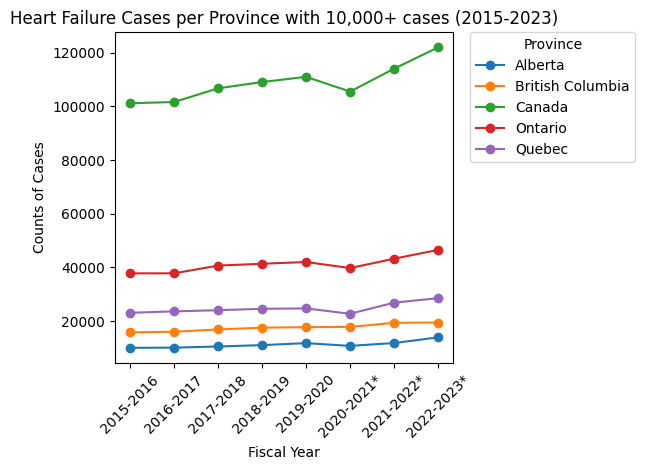

In [36]:
#Create a DataFrame for provinces with 10000 or more cases
failure_incidence_high_cases = incidence_failure_final[incidence_failure_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
failure_incidence_low_cases = incidence_failure_final[incidence_failure_final['Counts'] < 10000]

#Pivot the DataFrames
failure_incidence_df = failure_incidence_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
failure_incidence_df1 = failure_incidence_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
failure_incidence_df.plot(kind='line', marker='o')
plt.title('Heart Failure Cases per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig(f"../Output/failure_incidence_10k+.png",bbox_inches='tight')
plt.show()


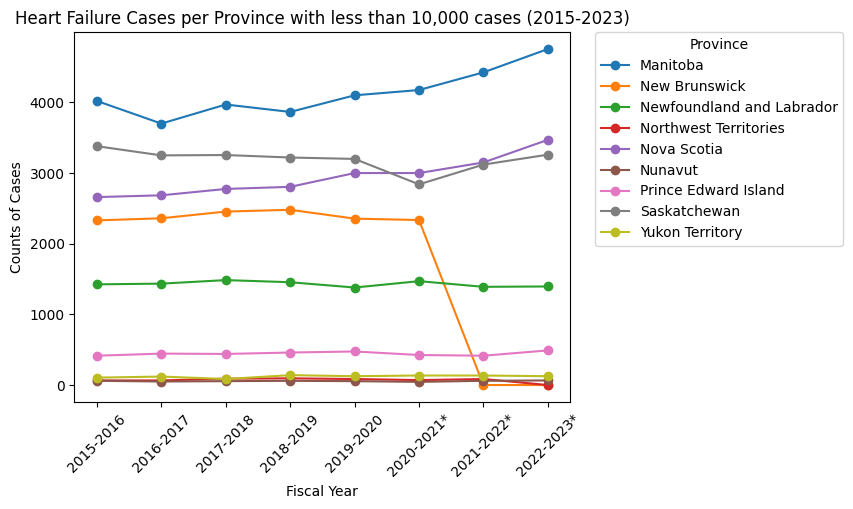

In [37]:
#Plot the data for low cases
failure_incidence_df1.plot(kind='line', marker='o')
plt.title('Heart Failure Cases per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/failure_incidence_<10k.png", bbox_inches='tight')
plt.show()

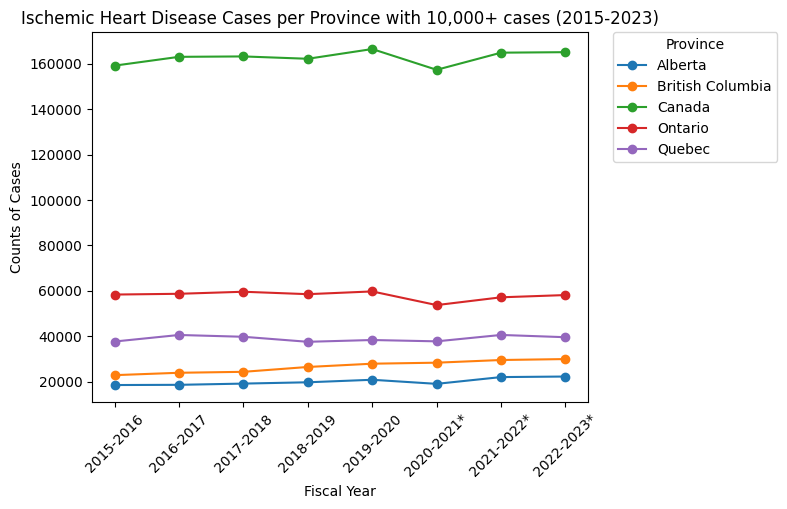

In [38]:
#Create a DataFrame for provinces with 10000 or more cases
ischemic_incidence_high_cases = incidence_ischemic_final[incidence_ischemic_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
ischemic_incidence_low_cases = incidence_ischemic_final[incidence_ischemic_final['Counts'] < 10000]
#Pivot the DataFrames
ischemic_incidence_df = ischemic_incidence_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
ischemic_incidence_df1 = ischemic_incidence_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
ischemic_incidence_df.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Cases per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_incidence_10k+.png", bbox_inches='tight')
plt.show()

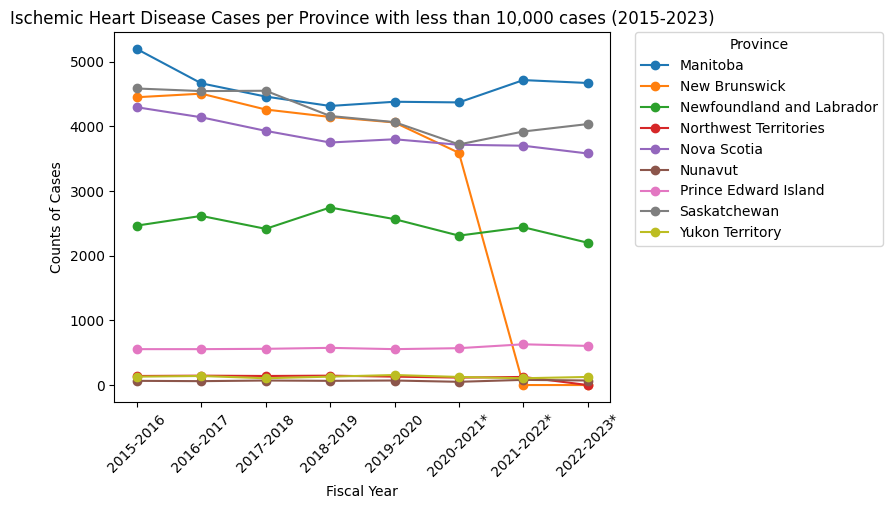

In [39]:
#Plot the data for low cases
ischemic_incidence_df1.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Cases per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_incidence_<10k.png", bbox_inches='tight')
plt.show()

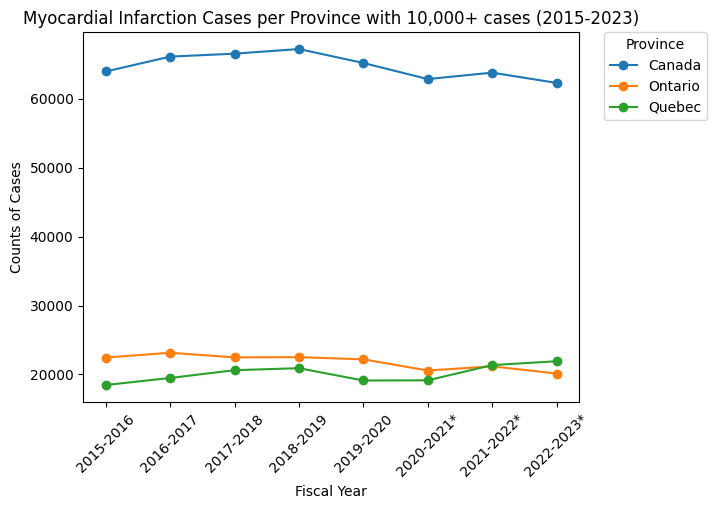

In [40]:
#Create a DataFrame for provinces with 10000 or more cases
myocardial_incidence_high_cases = incidence_myocardial_final[incidence_myocardial_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
myocardial_incidence_low_cases = incidence_myocardial_final[incidence_myocardial_final['Counts'] < 10000]

#Pivot the DataFrames
myocardial_incidence_df = myocardial_incidence_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
myocardial_incidence_df1 = myocardial_incidence_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
myocardial_incidence_df.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Cases per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_incidence_10k+.png", bbox_inches='tight')
plt.show()

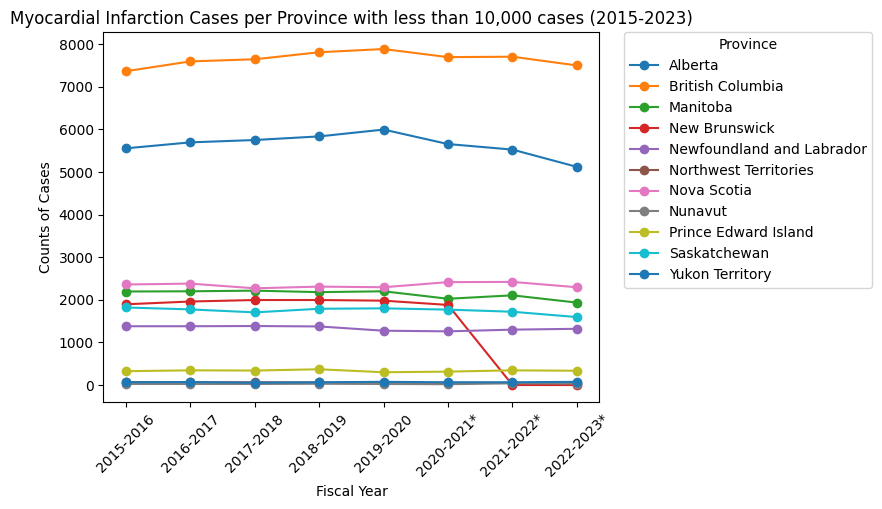

In [41]:
#Plot the data for low cases
myocardial_incidence_df1.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Cases per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_incidence_<10k.png", bbox_inches='tight')
plt.show()

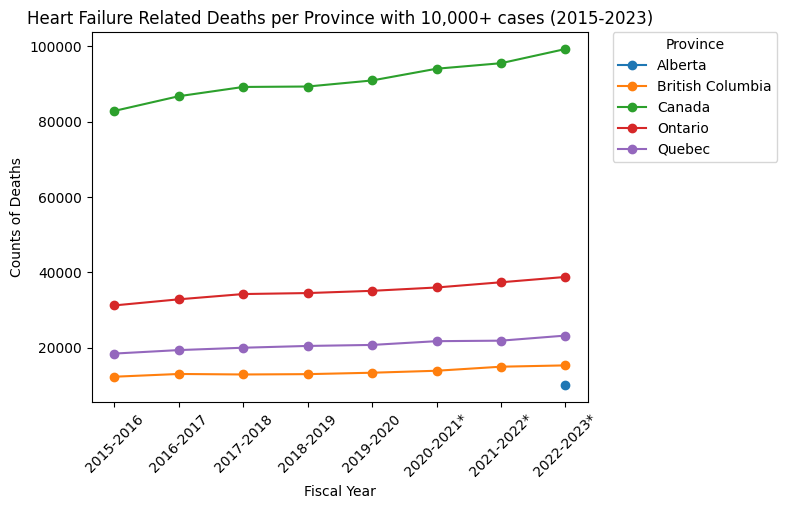

In [43]:
#Create a DataFrame for provinces with 10000 or more cases
failure_mortality_high_cases = mortality_failure_final[mortality_failure_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
failure_mortality_low_cases = mortality_failure_final[mortality_failure_final['Counts'] < 10000]

#Pivot the DataFrames
failure_mortality_df = failure_mortality_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
failure_mortality_df1 = failure_mortality_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
failure_mortality_df.plot(kind='line', marker='o')
plt.title('Heart Failure Related Deaths per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/failure_mortality_10k+.png",bbox_inches='tight')
plt.show()

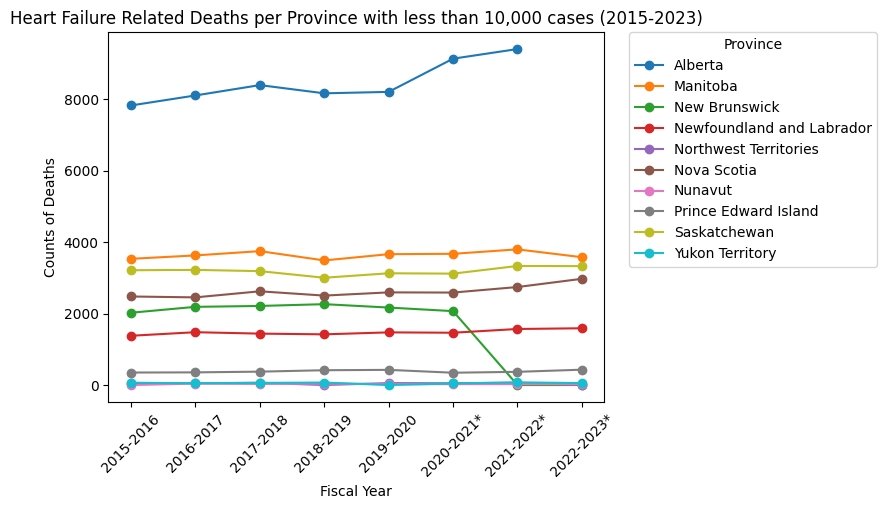

In [44]:
#Plot the data for low cases
failure_mortality_df1.plot(kind='line', marker='o')
plt.title('Heart Failure Related Deaths per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/failure_mortality_<10k.png",bbox_inches='tight')
plt.show()

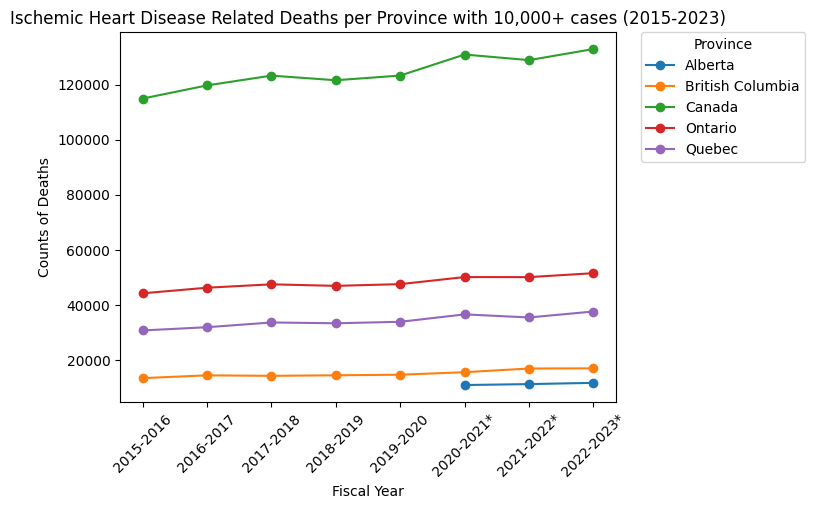

In [45]:
#Create a DataFrame for provinces with 10000 or more cases
ischemic_mortality_high_cases = mortality_ischemic_final[mortality_ischemic_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
ischemic_mortality_low_cases = mortality_ischemic_final[mortality_ischemic_final['Counts'] < 10000]

#Pivot the DataFrames
ischemic_mortality_df = ischemic_mortality_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
ischemic_mortality_df1 = ischemic_mortality_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
ischemic_mortality_df.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Related Deaths per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_mortality_10k+.png",bbox_inches='tight')
plt.show()

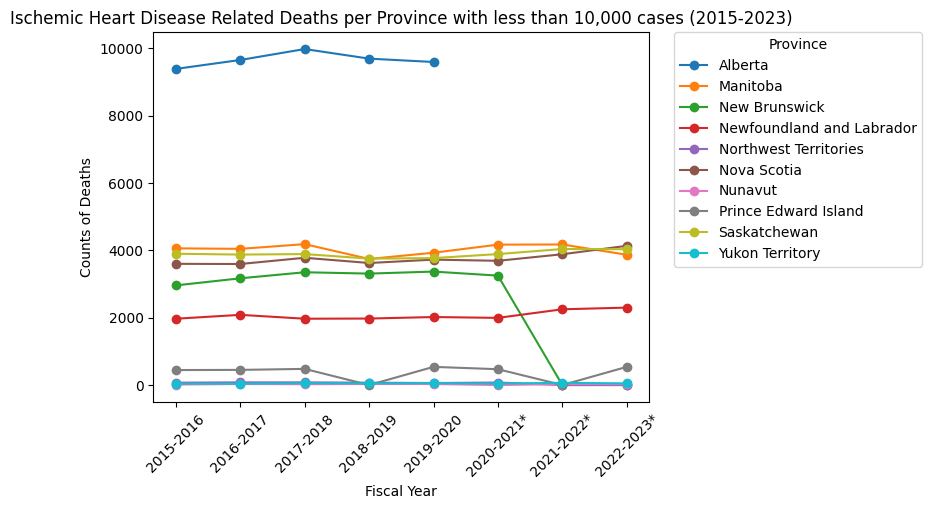

In [46]:
#Plot the data for low cases
ischemic_mortality_df1.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Related Deaths per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_mortality_<10k.png",bbox_inches='tight')
plt.show()

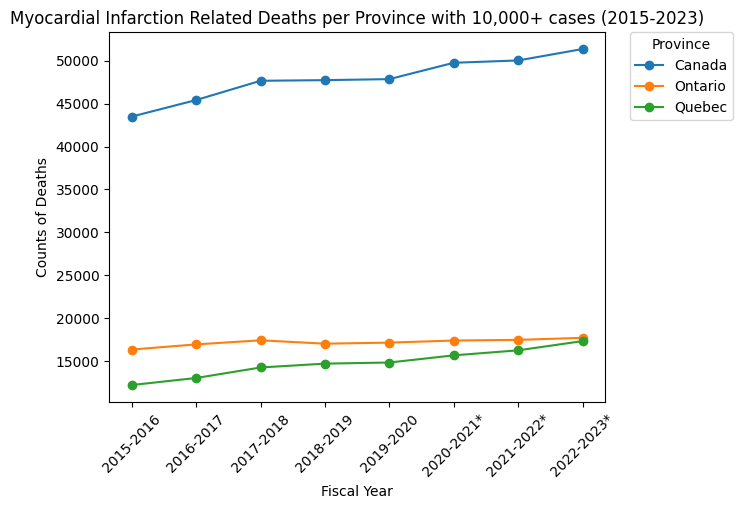

In [47]:
#Create a DataFrame for provinces with 10000 or more cases
myocardial_mortality_high_cases = mortality_myocardial_final[mortality_myocardial_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
myocardial_mortality_low_cases = mortality_myocardial_final[mortality_myocardial_final['Counts'] < 10000]

#Pivot the DataFrames
myocardial_mortality_df = myocardial_mortality_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
myocardial_mortality_df1 = myocardial_mortality_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
myocardial_mortality_df.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Related Deaths per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_mortality_10k+.png",bbox_inches='tight')
plt.show()

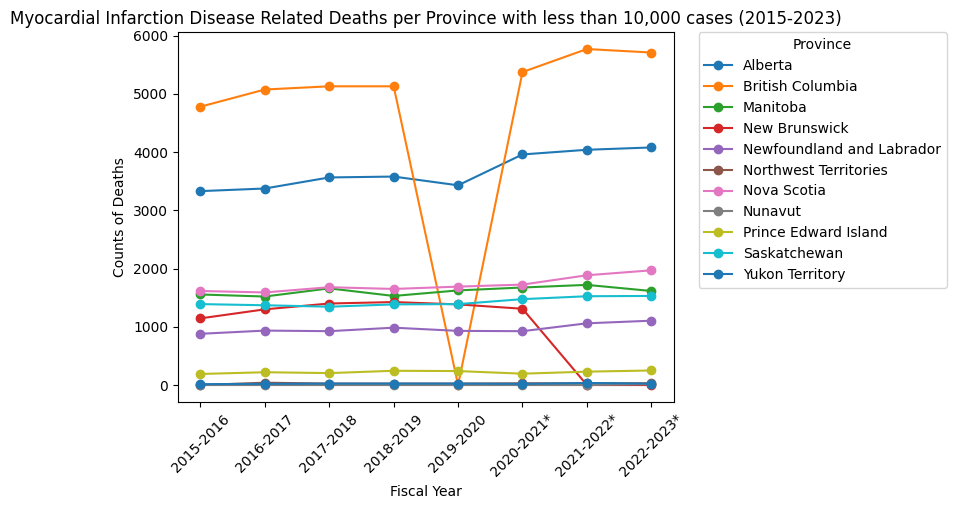

In [48]:
#Plot the data for low cases
myocardial_mortality_df1.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Disease Related Deaths per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_mortality_<10k.png",bbox_inches='tight')
plt.show()

/Users/ahmedmansour/Desktop/datacourse/git_branch/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


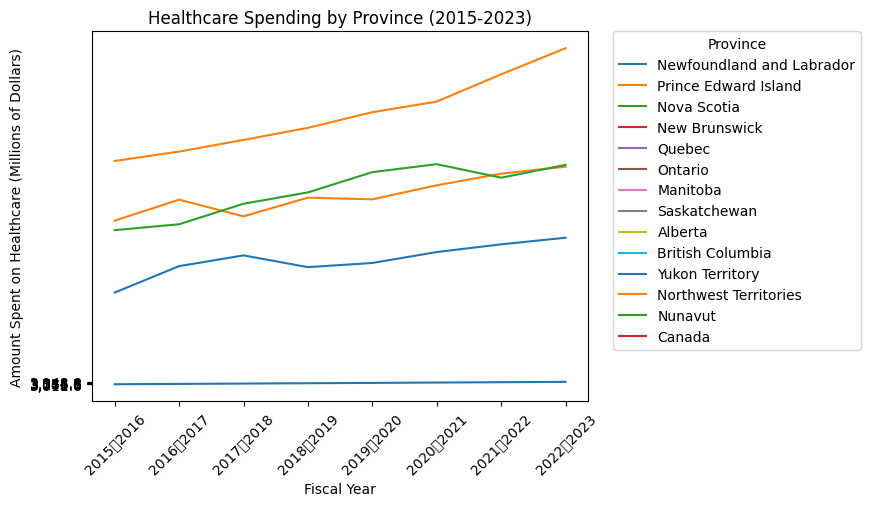

In [64]:
#Plot the data
healthcare_spending_final[healthcare_spending_final.columns[1:]] = healthcare_spending_final[healthcare_spending_final.columns[1:]].apply(pd.to_numeric, errors='coerce')
for province in healthcare_spending_final.columns:
    plt.plot(healthcare_spending_final.index, healthcare_spending_final[province], label=province)  

plt.title('Healthcare Spending by Province (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount Spent on Healthcare (Millions of Dollars)')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  
plt.xticks(rotation=45)  
plt.show()